<a href="https://colab.research.google.com/github/alexandreIFB/airbnb-buenosaires/blob/master/AirBnbBuenosAires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Argentina - Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Argentina - Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Conhecendo os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregando os dados
df = pd.read_csv('/content/listings.csv')

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,4673,3,1,2011-01-31,0.01,1,365
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,5589,2,27,2021-04-03,0.25,1,365
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2519,1,20,2017-12-11,0.15,1,365


## **Dicionario dos dados**



*   `id`: Algo único que identifica a propriedade a ser alugada.
*   `host_id`:  Algo único que identifica o proprietário da casa alugada.
*   `host_name`: Nome do proprietário da casa alugada.
*   `neighbourhood_group`: 
*   `neighbourhood`: Nome do bairro.
*   `latitude e longitude`: Posição x , y geográfica da propriedade.
*   `room_type`: Tipo da propriedade.
*   `price`: Preço por noite em na moeda local.
*   `minimum_nights`: Minimo de noites na qual a propriedade pode ser alugada.
*   `number_of_reviews`: Número de avaliações da propriedade.
*   `last_review`: Última avaliação da casa.  
*   `reviews_per_month`: Número de avaliações por mês da propriedade.
* `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião.
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.






## **Tamanho do nossos dados**

In [ ]:
print('Entradas(Linhas):\t{}'.format(df.shape[0]))
print('Recursos(Colunas):\t{}'.format(df.shape[1]))

Entradas(Linhas):	19765
Recursos(Colunas):	16


## **Algumas informações da estutura de nossos dados**

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19765 non-null  int64  
 1   name                            19760 non-null  object 
 2   host_id                         19765 non-null  int64  
 3   host_name                       19013 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19765 non-null  object 
 6   latitude                        19765 non-null  float64
 7   longitude                       19765 non-null  float64
 8   room_type                       19765 non-null  object 
 9   price                           19765 non-null  int64  
 10  minimum_nights                  19765 non-null  int64  
 11  number_of_reviews               19765 non-null  int64  
 12  last_review                     

Quanto ao tipo dos dados temos o esperado.


## Limpando os dados 

In [ ]:
df.isnull().sum()

id                                    0
name                                  5
host_id                               0
host_name                           752
neighbourhood_group               19765
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6175
reviews_per_month                  6175
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* `name` - mesma com uma quantidade pequena nula, é um dado que pode ser desconsiderado das nossas análises.
* `host_name` - é um dado que pode ser desconsiderado das nossas analises, vamos manter apenas o `host_id` e caso necessário voltamos com ele.
* `neighbourhood_group` - Não tem nenhuma entrada com valor válido, podemos retirar esse recurso.


In [ ]:
dropColumns = ['name','host_name','neighbourhood_group']

* `last_review` e `reviews_per_month` - Podem ter valores nulos pois pode acontecer de não ter sido alugada nenhuma vez, vamos verificar.

In [ ]:
df.loc[df.last_review.isnull()].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2639,1,0,NaN,NaN,7,365
6,13099,Lofty room in Palermo Viejo B&B pvt bath,50994,Ariel,NaN,Palermo,-34.59327,-58.42953,Private room,3518,1,0,NaN,NaN,7,365
9,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,NaN,San Nicolas,-34.60786,-58.37211,Entire home/apt,11178,1,0,NaN,NaN,1,365


A visualização foi reduzida, mas como esperado, entradas que têm `last_review` e `reviews_per_month` com valores nulos são propriedades que ainda não foram avaliadas nenhuma vez.

In [ ]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000253
host_id                           0.000000
host_name                         0.038047
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.312421
reviews_per_month                 0.312421
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Como essas entradas representam 31% dos nossos dados iremos manter, futuramente tratamos caso necessário.

In [ ]:
#Backup do dataset original

dfBackup = df

Fizemos um Backup do *DataFrame* original, agora podemos resolver as colunas que julgamos como desnecessárias para nossa análise.

In [ ]:
df.drop(dropColumns,axis=1,inplace=True)

df.head(3)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,13310,Balvanera,-34.60523,-58.41042,Entire home/apt,4673,3,1,2011-01-31,0.01,1,365
1,11508,42762,Palermo,-34.58184,-58.42415,Entire home/apt,5589,2,27,2021-04-03,0.25,1,365
2,12463,48799,Recoleta,-34.59777,-58.39664,Private room,2519,1,20,2017-12-11,0.15,1,365


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.976500e+04,1.976500e+04,19765.000000,19765.000000,1.976500e+04,19765.000000,19765.000000,13590.000000,19765.000000,19765.000000
mean,2.844476e+07,1.087924e+08,-34.592532,-58.415146,5.445724e+03,6.990842,16.191500,0.648988,7.597723,222.324715
std,1.386706e+07,1.068620e+08,0.017988,0.029540,7.121200e+04,22.174766,33.497445,0.813040,17.446397,135.325976
min,6.283000e+03,2.616000e+03,-34.689620,-58.532940,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.855038e+07,1.419972e+07,-34.603050,-58.434460,1.682000e+03,2.000000,0.000000,0.120000,1.000000,89.000000
50%,3.156196e+07,6.725537e+07,-34.591740,-58.414230,2.617000e+03,3.000000,3.000000,0.350000,2.000000,217.000000
75%,3.969993e+07,1.897563e+08,-34.582220,-58.391130,4.198000e+03,5.000000,17.000000,0.880000,4.000000,364.000000
max,4.942970e+07,3.984731e+08,-34.531640,-58.355410,9.345669e+06,1100.000000,500.000000,16.550000,131.000000,365.000000


id é host_id são variáveis que, apesar de serem numéricas não nos traz nenhum dado estatístico, vamos tratá-las

## Alterando o index e tipo.

Esse é um insight que geralmente temos no início da nossa análise, como id é algo único de nossas entradas podemos usar o mesmo como index.

In [ ]:
df.index = df.id
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head(2)

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
6283,13310,Balvanera,-34.60523,-58.41042,Entire home/apt,4673,3,1,2011-01-31,0.01,1,365
11508,42762,Palermo,-34.58184,-58.42415,Entire home/apt,5589,2,27,2021-04-03,0.25,1,365


Quanto ao `host_id` podemos trazer ele para uma variável do tipo string.

In [ ]:
df.host_id =df.host_id.astype(str)

In [ ]:
df.head(2)

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
6283,13310,Balvanera,-34.60523,-58.41042,Entire home/apt,4673,3,1,2011-01-31,0.01,1,365
11508,42762,Palermo,-34.58184,-58.42415,Entire home/apt,5589,2,27,2021-04-03,0.25,1,365


Agora é esperado que id e host_id não entre mas como dados numéricos/estatísticos.

# Olhando dados númericos

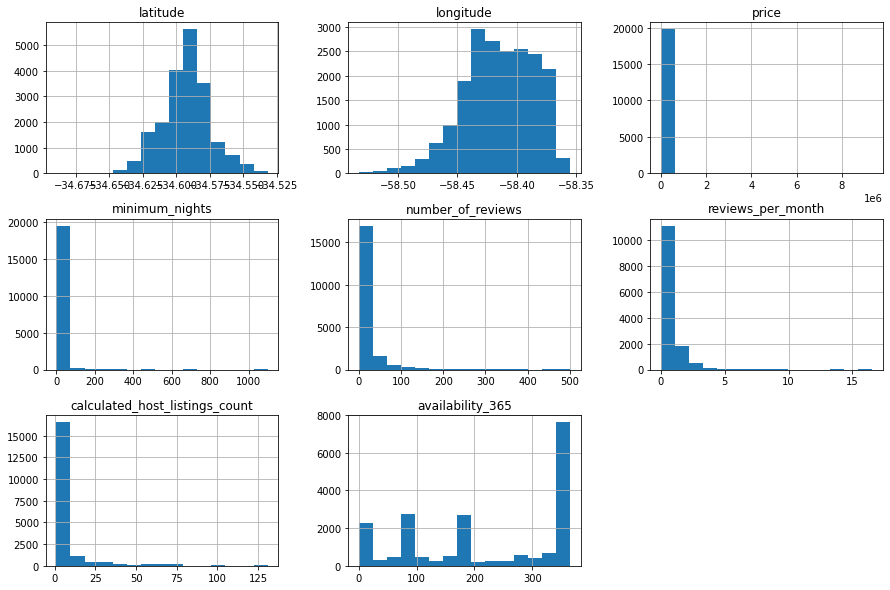

In [ ]:
df.hist(bins=15, figsize=(15,10));

## Corrigindo algumas variáveis
 
Algumas variáveis possuem uma pequena quantidade de valor, que não apesar de não serem incorretos não representa muito a realidade, devido a isso iremos fazer algumas alterações

### Price 

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19765.000000,19765.000000,1.976500e+04,19765.000000,19765.000000,13590.000000,19765.000000,19765.000000
mean,-34.592532,-58.415146,5.445724e+03,6.990842,16.191500,0.648988,7.597723,222.324715
std,0.017988,0.029540,7.121200e+04,22.174766,33.497445,0.813040,17.446397,135.325976
min,-34.689620,-58.532940,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,-34.603050,-58.434460,1.682000e+03,2.000000,0.000000,0.120000,1.000000,89.000000
50%,-34.591740,-58.414230,2.617000e+03,3.000000,3.000000,0.350000,2.000000,217.000000
75%,-34.582220,-58.391130,4.198000e+03,5.000000,17.000000,0.880000,4.000000,364.000000
max,-34.531640,-58.355410,9.345669e+06,1100.000000,500.000000,16.550000,131.000000,365.000000


`price`: de cara conseguimos observar que provavelmente tem alguns valores fora do padrão (não necessariamente incorretos) que está trazendo nosso desvio padrão as alturas, observe que 75% dos valores está na faixa dos 4198, porém o máximo está em 9345669, altíssimo, para nossa análise podemos fazer um corte que desconsidere esses valores
 
Para tal corte iremos achar uma faixa de valor que retira apenas 3% dos nossos dados.

In [ ]:
df.loc[df.price > 14000].shape[0] / df.shape[0] * 100

2.74728054642044

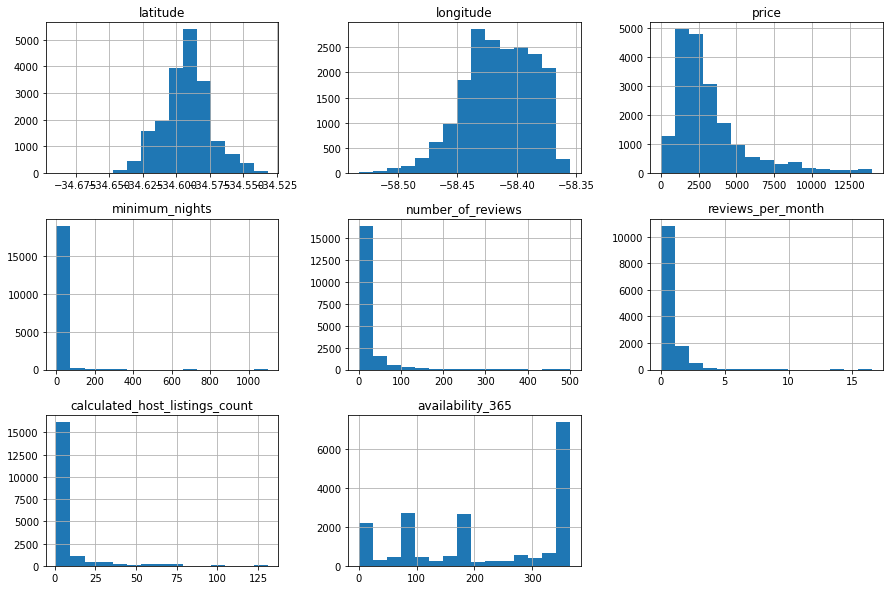

In [ ]:
df.drop(df[df.price > 14000].index, axis=0, inplace=True)

df.hist(bins=15, figsize=(15,10));

Observe que a distribuição de `price` é bem mais agradável de se analisar, apesar de ter alguns valores altos, são perceptíveis. 

In [ ]:
df.price.describe()


count    19222.000000
mean      3288.957236
std       2441.280595
min          0.000000
25%       1679.000000
50%       2592.000000
75%       4000.000000
max      14000.000000
Name: price, dtype: float64

### Minimo de noites

count    19222.000000
mean         6.967953
std         21.940529
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1100.000000
Name: minimum_nights, dtype: float64

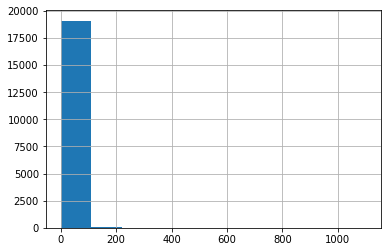

In [ ]:
df.minimum_nights.hist();
df.minimum_nights.describe()

`Minimum_nights` representa a quantidade de noites mínimas que a propriedade pode ser alugada, repare que a grande maioria dos dados se concentram na faixa de 1 a 5 noites, o que faz sentido pois o mais comum são opção de:
* Fim de semana( Sexta-Sáb )
* Fim de semana inteiro ( Sexta,Sab,Dom)..
* Semana inteira.
 
Apesar dessa concentração, temos valores altos que não representam muito a realidade é que estão deixando nossa variável com um desvio padrão muito alto, assim como fizemos em `price`, podemos fazer um corte.


Para mim 30 dias é um valor, que ainda que não seja comum faz sentido a gente manter pois existem alguns proprietários que gostam de fechar pacotes mensais, além do mais iremos perder apenas `2%` dos dados.

In [ ]:
df.loc[df.minimum_nights > 30].shape[0] / df.shape[0] * 100

2.0185204453230674

count    18834.000000
mean         4.700595
std          6.259969
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64

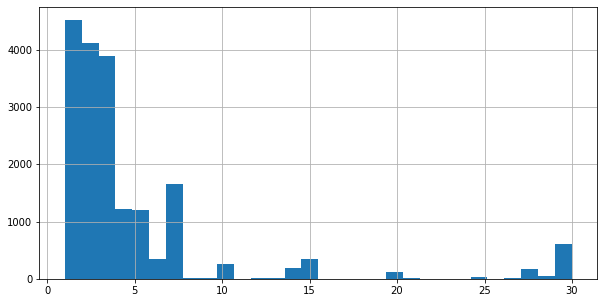

In [ ]:
df.drop(df.loc[df.minimum_nights > 30].index,axis=0,inplace=True)

df.minimum_nights.hist(bins=30,figsize=(10,5));
df.minimum_nights.describe()

In [ ]:
df.minimum_nights.value_counts().sort_values(ascending=False)[:10] / df.shape[0] * 100

1     23.999150
2     21.859403
3     20.638207
7      8.835085
4      6.477647
5      6.371456
30     3.238823
6      1.874270
15     1.794627
10     1.412339
Name: minimum_nights, dtype: float64

## Após tratativas.

Após tratativas de outliers, vamos olhar nossos dados.

Agora conseguimos ver a distribuição de uma maneira bem mais agradável.

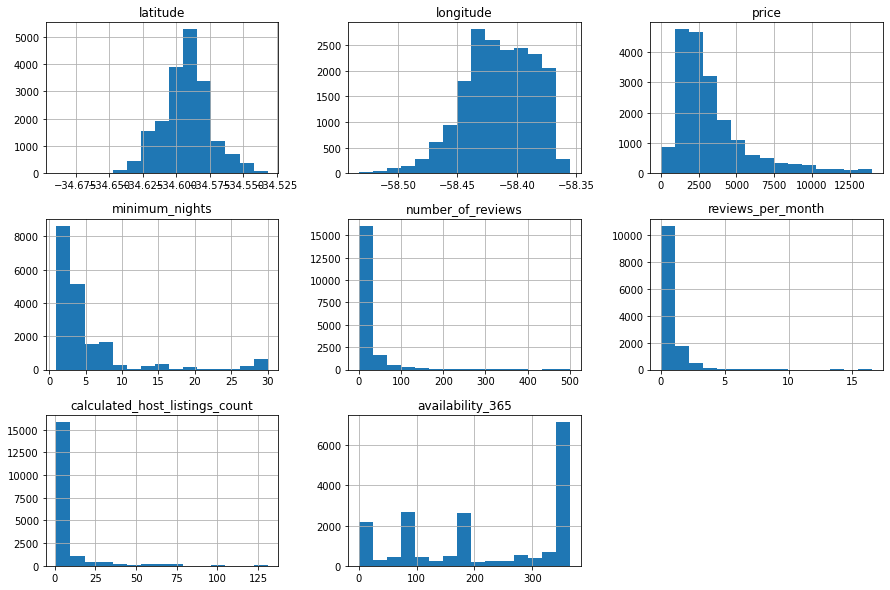

In [ ]:
df.hist(bins=15, figsize=(15,10));

# Algumas analises

Ao se falar em aluguel de casas/quartos/apt dentre outros, uma das variáveis mais importantes é o preço, vamos dar uma aprofundada nela.

## Qual á média do preço do alguel?

In [ ]:
df.price.mean()

3287.7457258150152

## Quais tipos de propriedade estão disponiveis?

* Dentre elas, qual é a mais frequente?

In [ ]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
df.room_type.value_counts()

Entire home/apt    14752
Private room        3508
Shared room          414
Hotel room           160
Name: room_type, dtype: int64

In [ ]:
# Em %
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    78.326431
Private room       18.625889
Shared room         2.198152
Hotel room          0.849527
Name: room_type, dtype: float64

Reparem que a maioria das opções são apartamentos ou casas, seguido por quarto privado, quartos compartilhados são mais raros de serem encontrados, são poucas pessoas que se sentem confortáveis com tal opção, já para os turistas de rápida passagem as opções no Airbnb são poucas.

## Qual a media do aluguel por cada tipo?
 

In [134]:
for tipo in df.room_type.unique():
  print("Propriedades {} Tem a media = {:.2f} $ARS".format(tipo,df[df.room_type == tipo].price.mean()))

Propriedades Entire home/apt Tem a media = 3629.49 $ARS
Propriedades Private room Tem a media = 2047.86 $ARS
Propriedades Shared room Tem a media = 1514.91 $ARS
Propriedades Hotel room Tem a media = 3550.68 $ARS


Esse resultado é algo que é esperado, quartos privados e compartilhado são opções baratas, que geralmente é escolhido por estudantes e pessoas de outro país,solteiras, que buscam se estabilizar na cidade, hotéis já são opção onde para turistas que vão passar pouco tempo e apartamento para pessoas que já estão estáveis na cidade, com poder aquisitivo maior.

## Buscando relações entre as variáveis
 
Correlação é qualquer geração de dependência entre duas variáveis, alguns exemplos são:
 
* Uma sobe outra a baixa, se uma sobe a outra também sobe e vice e versa.
 
Iremos visualizar de duas maneiras
 
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.026359,-0.054912,-0.109873,0.132497,0.058226
minimum_nights,-0.026359,1.000000,-0.071922,-0.112538,0.083456,0.009389
number_of_reviews,-0.054912,-0.071922,1.000000,0.739524,-0.061188,-0.008074
reviews_per_month,-0.109873,-0.112538,0.739524,1.000000,-0.015239,-0.066611
calculated_host_listings_count,0.132497,0.083456,-0.061188,-0.015239,1.000000,0.048917
availability_365,0.058226,0.009389,-0.008074,-0.066611,0.048917,1.000000


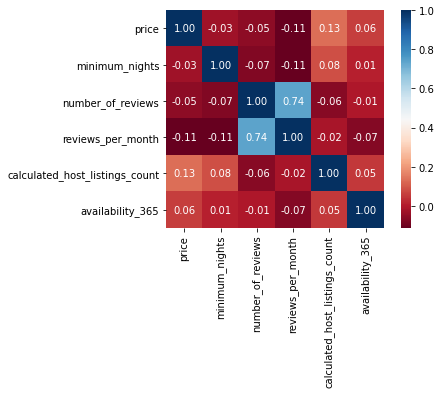

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Qual é a localidade mais cara da cidade?
 
Toda cidade existem lugares que possuem valores mais elevados do que outros, seja pela proximidade do centro, por ser bairro nobre, próximo a pontos turísticos, dentre outros.
 
Iremos analisar quais bairros têm o valor mais elevado em nossa cidade de análise.

In [ ]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    7334.117978
Villa Soldati    5462.333333
Villa Real       3868.875000
Palermo          3781.922186
Recoleta         3575.485058
Retiro           3415.340237
Floresta         3383.680000
Villa Devoto     3379.963636
Belgrano         3284.062267
Nuñez            3274.375000
Name: price, dtype: float64

Mesmo sem conhecer a cidade, uma análise a se fazer antes de concluir é a quantidade de entrada de cada cidade, pois podemos ter algum bairro com quantidade pequenas e valores altos, que às vezes, não representam a realidade como um todo.

In [ ]:
bairros_caros = df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).index[:10]


for i in bairros_caros:
  print("Bairro = {}, % dos dados = {}".format(i,df.loc[df.neighbourhood == i].shape[0] / df.shape[0] * 100))

Bairro = Puerto Madero, % dos dados = 0.9450992885207603
Bairro = Villa Soldati, % dos dados = 0.01592863969417012
Bairro = Villa Real, % dos dados = 0.042476372517786985
Bairro = Palermo, % dos dados = 30.705107783795267
Bairro = Recoleta, % dos dados = 16.879048529255602
Bairro = Retiro, % dos dados = 5.3838802166295
Bairro = Floresta, % dos dados = 0.1327386641180843
Bairro = Villa Devoto, % dos dados = 0.2920250610597855
Bairro = Belgrano, % dos dados = 4.263565891472868
Bairro = Nuñez, % dos dados = 1.868960390782627


Embora alguns bairros sejam caros, por ter uma pequena quantidade de dados devemos fazer uma analise mais profunda.

No dataset temos informações de localização, podemos criar uma mapa de calor para observar a distribuição do preço por localidade

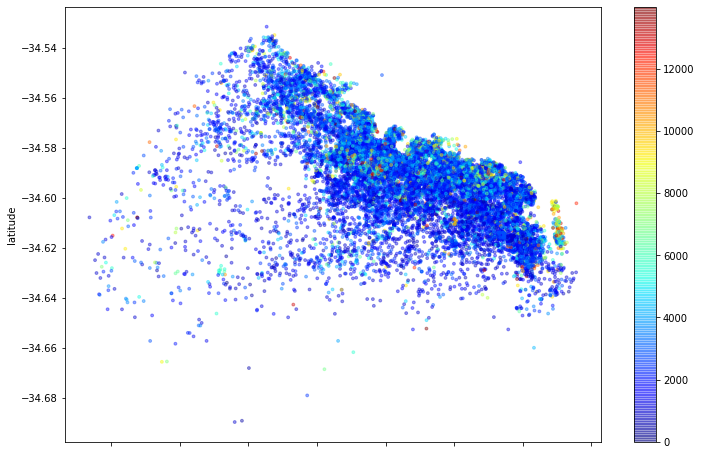

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

<img src='https://www.google.com/maps/vt/data=8jOvTIw-DRWcmvto4Lfh2dTfUaY4qQTulOK0LqevR2GYlEUaNqA5bUQvNC3JucSgyy529jYxCF3DhGopOigmqQOXdCQ6IBmlUvZJVfu2BN00JpQ78ozyuXhHP24HujiK1MEsO5UnXi8F5BAQ__KqKdIQmJlCNcBHipCSF8VeudQ_ksOtWbew9eH4qfDBLQO54QHoVm_4pWLgEH-HM3yodPGZWir48xzmhTv42s2cax78r_D9eg'/>

# Conclusão

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.